# Statistics of annotated e-mails

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the CSV files into DataFrames
email1_user1_df = pd.read_csv('EmailAnnotation1/user1.csv')
email1_pedro_df = pd.read_csv('EmailAnnotation1/pedro.csv')
email2_user3_df = pd.read_csv('EmailAnnotation2/user3.csv')
email2_artur_df = pd.read_csv('EmailAnnotation2/artur.csv')

In [3]:
# Merge the DataFrames based on the 'id' to compare annotations
email1_df = pd.merge(email1_user1_df, email1_pedro_df, on='id', suffixes=('_user1', '_pedro'))
email2_df = pd.merge(email2_user3_df, email2_artur_df, on='id', suffixes=('_user3', '_artur'))
email1_df.head(1)

# Ensure labels are strings
email1_df['label_user1'] = email1_df['label_user1'].astype(str)
email1_df['label_pedro'] = email1_df['label_pedro'].astype(str)
email2_df['label_user3'] = email2_df['label_user3'].astype(str)
email2_df['label_artur'] = email2_df['label_artur'].astype(str)

### Calcualte agreement and percentage

In [4]:
# Function to calculate agreement and percentage
def calculate_agreement(df, label1, label2):
    agreement = df[label1] == df[label2]
    percentage_agreement = agreement.sum() / len(agreement)
    return agreement.sum(), percentage_agreement

# Calculate agreement and percentage for annotator pairs
agreement_user1_pedro, percentage_agreement_user1_pedro = calculate_agreement(email1_df, 'label_user1', 'label_pedro')
agreement_user3_artur, percentage_agreement_user3_artur = calculate_agreement(email2_df, 'label_user3', 'label_artur')

### Matrix of emotion pairs and their counts

In [5]:
# Function to build a matrix of emotion pairs and their counts
def build_emotion_pair_matrix(df, label1, label2):
    pairs = list(zip(df[label1], df[label2]))
    pair_counts = Counter(pairs)
    emotions = sorted(set(df[label1]) | set(df[label2]))
    matrix = pd.DataFrame(0, index=emotions, columns=emotions)
    
    for (emotion1, emotion2), count in pair_counts.items():
        matrix.loc[emotion1, emotion2] = count
    
    return matrix

# Build emotion pair matrices for annotator pairs
emotion_pair_matrix_user1_pedro = build_emotion_pair_matrix(email1_df, 'label_user1', 'label_pedro')
emotion_pair_matrix_user3_artur = build_emotion_pair_matrix(email2_df, 'label_user3', 'label_artur')

# Display the matrices as heatmaps
def plot_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(title)
    plt.xlabel('pedro' if 'pedro' in title else 'artur')
    plt.ylabel('user1' if 'user1' in title else 'user3')
    plt.show()

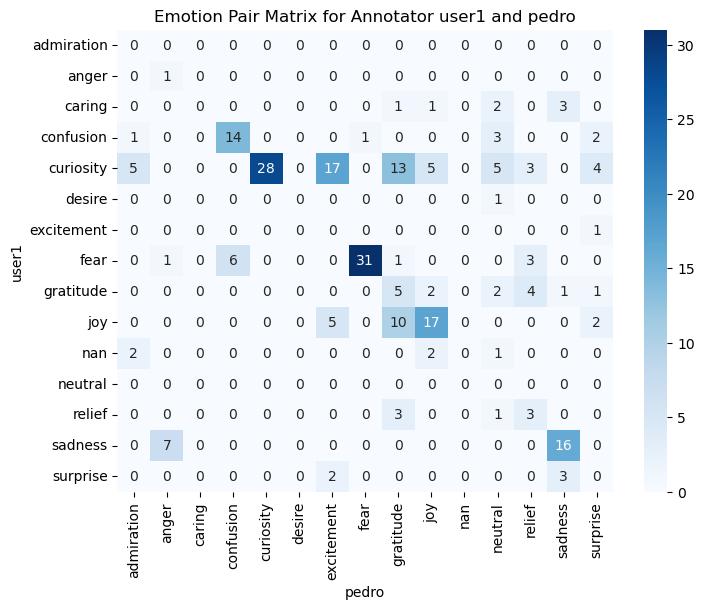

Agreement between Annotator user1 and pedro: 115 (47.52%)


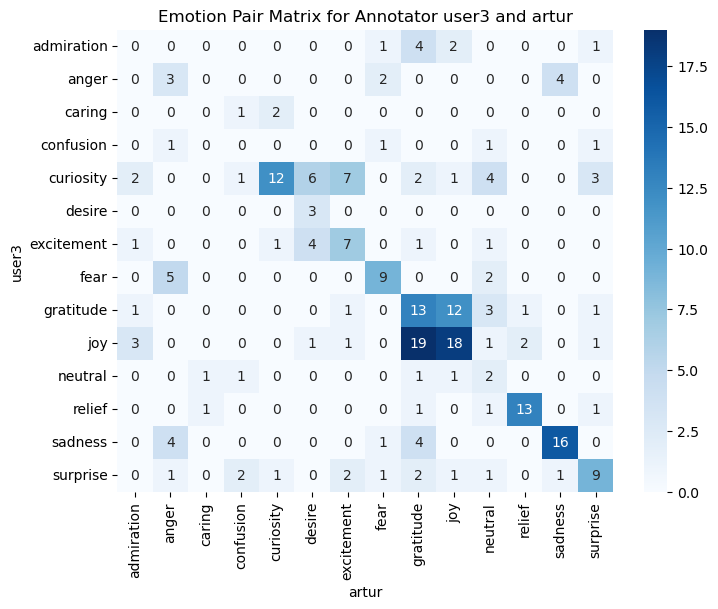

Agreement between Annotator user3 and artur: 105 (43.21%)


In [6]:
plot_heatmap(emotion_pair_matrix_user1_pedro, "Emotion Pair Matrix for Annotator user1 and pedro")
print(f'Agreement between Annotator user1 and pedro: {agreement_user1_pedro} ({percentage_agreement_user1_pedro:.2%})')
plot_heatmap(emotion_pair_matrix_user3_artur, "Emotion Pair Matrix for Annotator user3 and artur")
print(f'Agreement between Annotator user3 and artur: {agreement_user3_artur} ({percentage_agreement_user3_artur:.2%})')